In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import chi2_contingency

In [2]:
data = pd.read_csv('test.csv')
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [3]:
data.shape

(25976, 25)

In [4]:
data.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

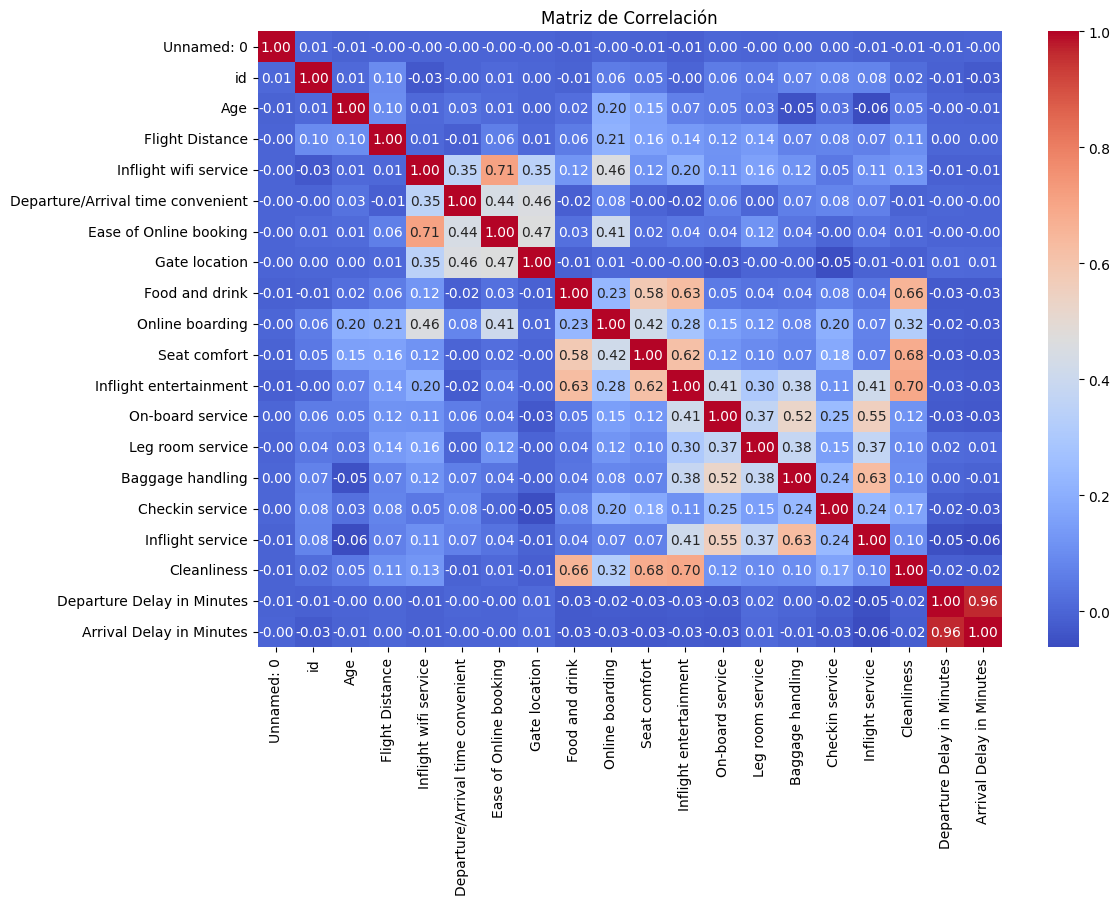

In [5]:
# Columnas numericas
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Matriz de correlacion 
matriz_correlacion = data[numerical_cols].corr()

# Grafica matriz de correlación heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

In [6]:
# Columnas categoricas
categorical_cols = data.select_dtypes(include=['object']).columns

# Tabla de contingencia y calcular el estadístico Chi-cuadrado
for col in categorical_cols:
    if col != 'satisfaction':
        contingency_table = pd.crosstab(data[col], data['satisfaction'])
        chi2, p, dof, ex = chi2_contingency(contingency_table)
        print(f'Variable: {col}')
        print(f'Chi^2: {chi2}, p-value: {p}')
        print()

Variable: Gender
Chi^2: 1.368158705041111, p-value: 0.24212849570930395

Variable: Customer Type
Chi^2: 837.2511339794698, p-value: 4.2975534526069954e-184

Variable: Type of Travel
Chi^2: 5334.846279468312, p-value: 0.0

Variable: Class
Chi^2: 6435.0352328191975, p-value: 0.0



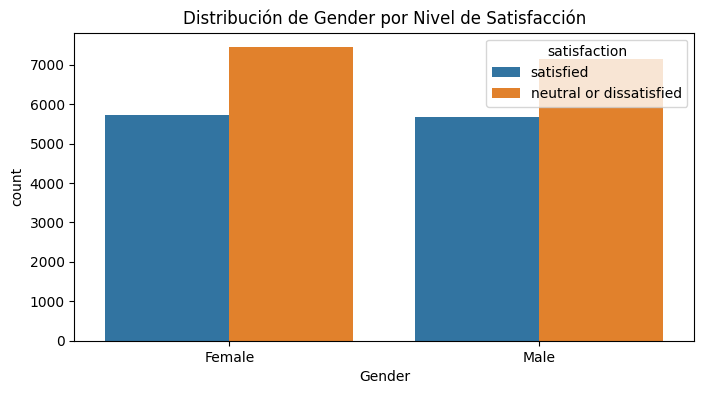

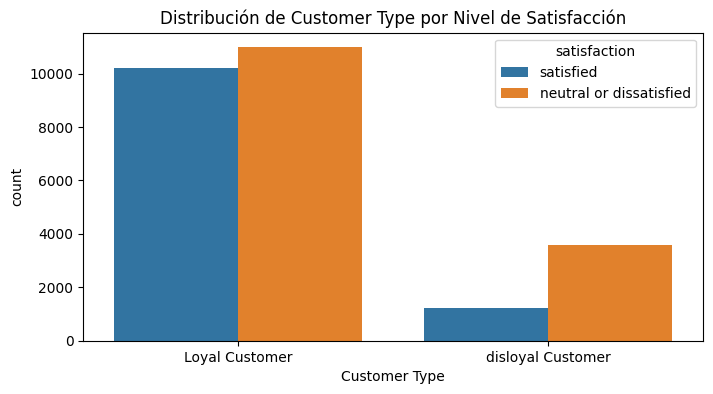

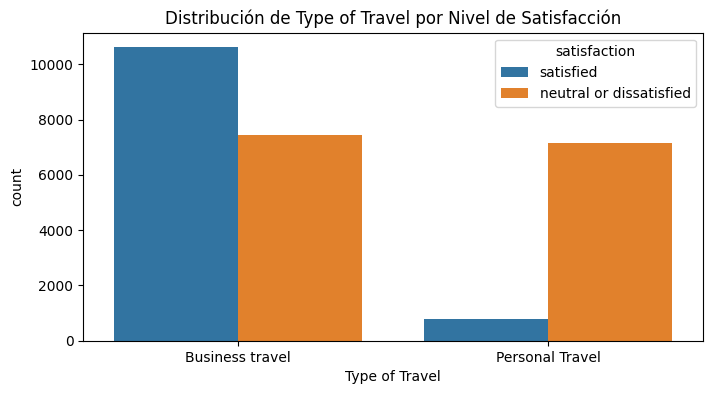

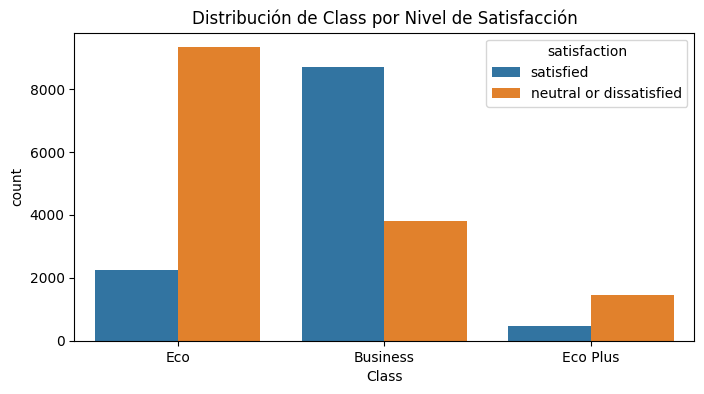

In [7]:
# Distribucion variables categoricas
for col in categorical_cols:
    if col != 'satisfaction':
        plt.figure(figsize=(8, 4))
        sns.countplot(data=data, x=col, hue='satisfaction')
        plt.title(f'Distribución de {col} por Nivel de Satisfacción')
        plt.show()

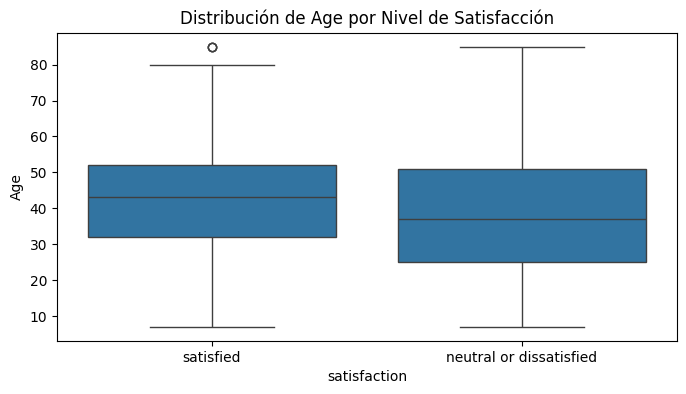

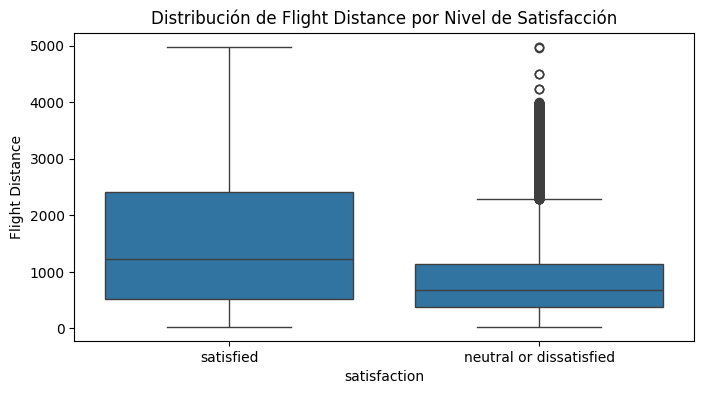

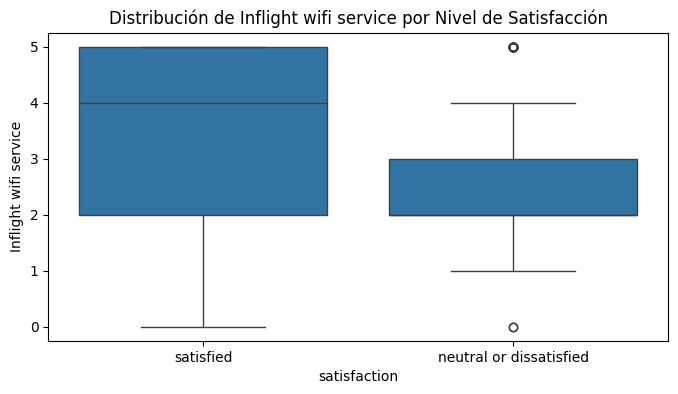

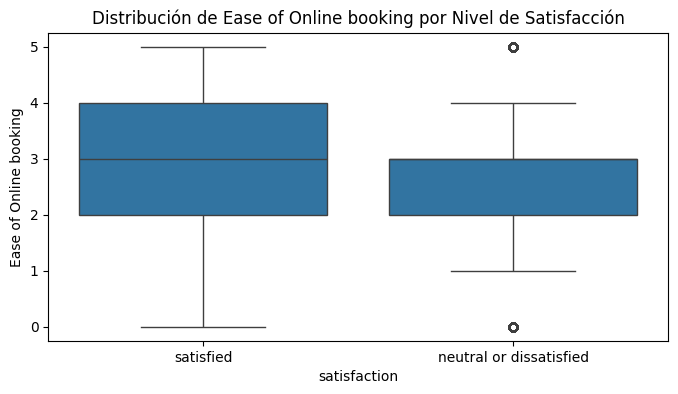

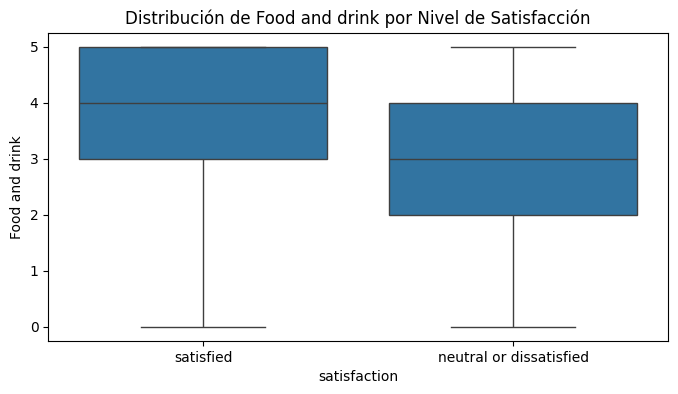

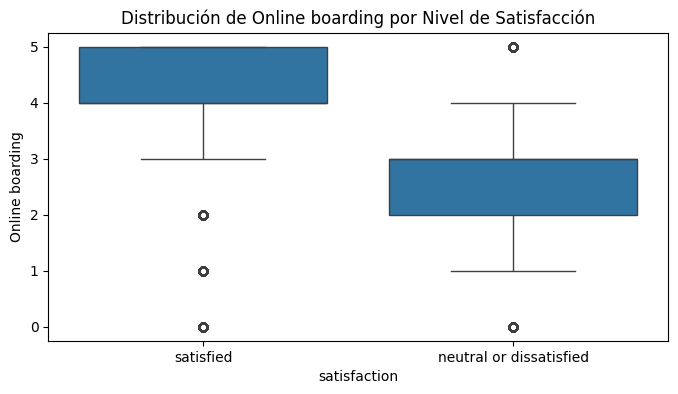

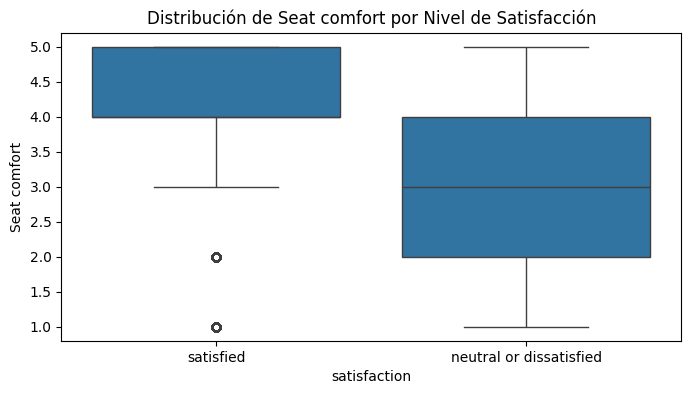

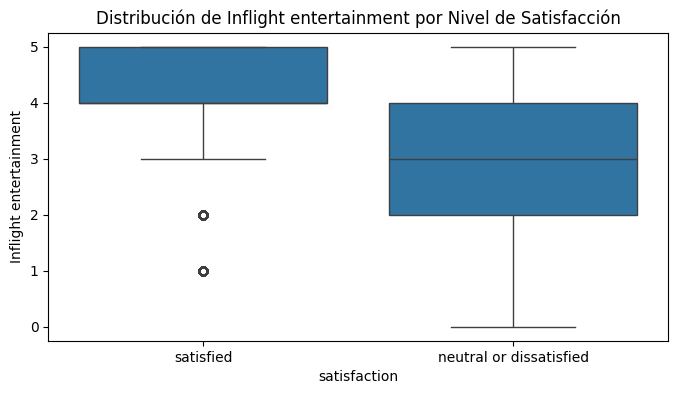

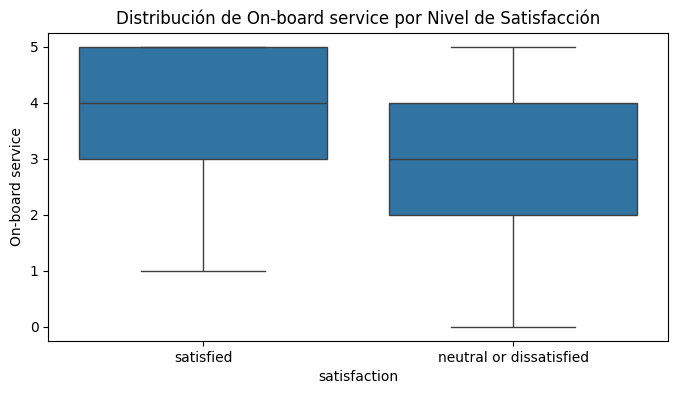

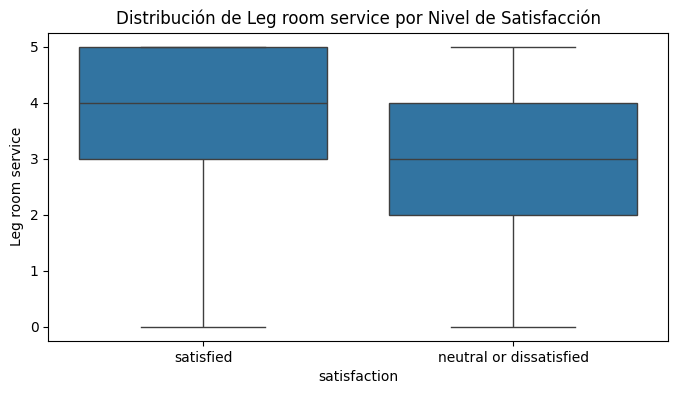

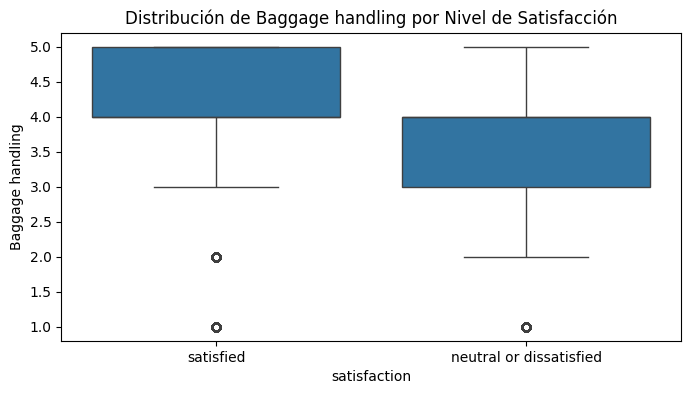

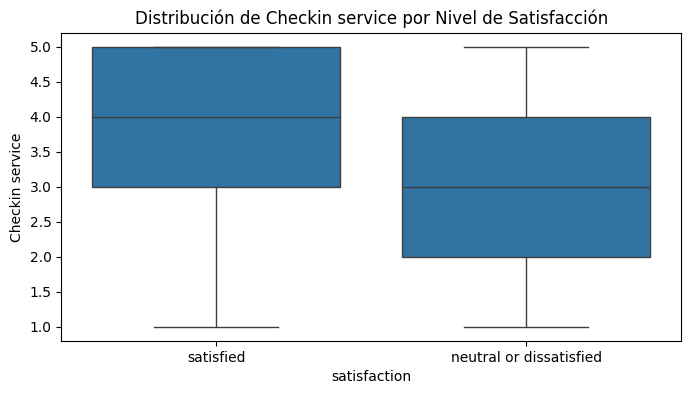

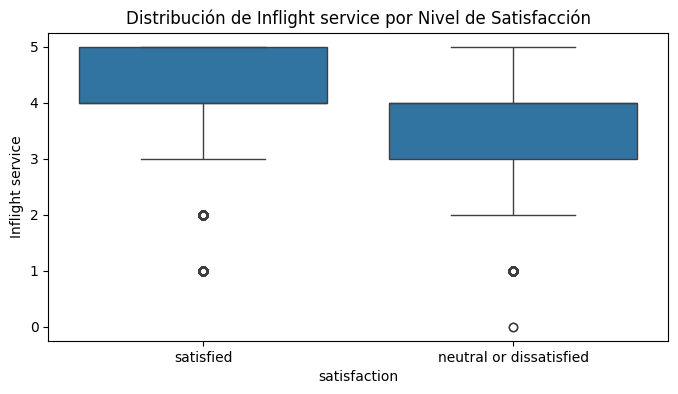

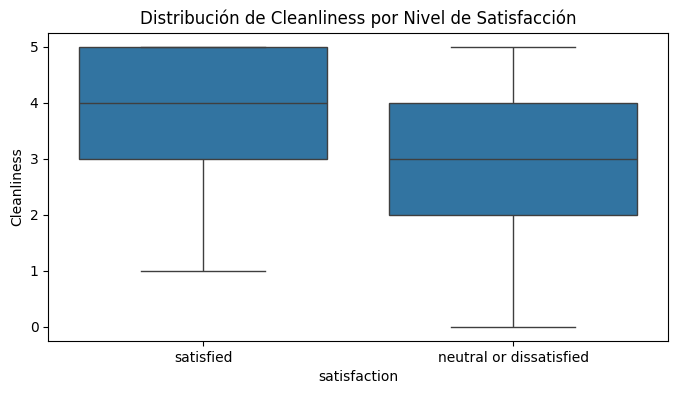

In [8]:
# Variables numericas relevantes para analisis de boxplots
numericas_relevantes = ['Age', 'Flight Distance', 'Inflight wifi service', 'Ease of Online booking', 'Food and drink', 
                        'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 
                        'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']

# Boxplots variables numericas y nivel de satisfaccion
for col in numericas_relevantes:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=data, x='satisfaction', y=col)
    plt.title(f'Distribución de {col} por Nivel de Satisfacción')
    plt.show()